# Topic: Exploring Mental Health in Tech Industry 

**Authors:**
> Shah Hamdani |
> Shaswat Shrestha |
> Abdul Wadood Butt

## Introduction

In this report, we are displaying trends of mental health inference with work performace for those individuals who are involved in Information Technological Industry. The data that is being used in this report was collected from a 2014 survey done by Open Sourcing Mental Illness (OSMI). OSMI is a nonprofit company that provides education and resources on supporting mental wellness in tech and open source communities.  

Please see the link for information about OSMI:

https://osmihelp.org/about/about-osmi

## Motivation
Being part of technology industry, it made us curious to learn more about mental health issues in tech industry. As we know, mental health has become an interesting and rising topic around world and we wanted to know how it has been affecting the industry. Therefore, we wanted to examine the data collected by OSMI. We will be comparing different categories like age groups, family history and etc. to the amount of interference in regards to mental health at workplace. Traditionally, it is presumed that being relaxed helps individuals to recover from mental illness and as a result work better and faster. 

##  Getting Started

#### Importing Libraries

You will need Python 3.5 and the following libraries:
- pandas
- numpy
- folium
- matplotlib/seaborn
- BeautifulSoup


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
import requests

import folium
from folium import IFrame
from folium.plugins import MarkerCluster

## Loading Data

We have obtained the original dataset from kaggle.com which is provided by OSMI.
The data was downloaded in csv file format and the file name is **"survey.csv"**.
In addition, we used pandas function called 'read_csv' to read the csv file. 

Please see the link below where the original dataset was obtained:

https://www.kaggle.com/osmi/mental-health-in-tech-survey

In [13]:
#Dataset Collection
df = pd.read_csv('survey.csv')

## Information about Original Dataset
As mentioned that we are using dataset that is provided by OSMI. In this dataset, it includes the answers of participants who took the survey and answered the questions in “yes” or “no” format. 

**The following is the content of all columns in the dataset that was given originally for this project. Please note, the content of columns is also provided in kaggle.com**


-	**Timestamp**: Time

-	**Age:** Age of the participant

-	**Gender: ** Gener of the participant

-	**Country:** Countr orgin of the participant

-	**state:** If you live in the United States, which state or territory do you live in?

-	**self_employed:** Are you self-employed?

-	**family_history:** Do you have a family history of mental illness?

-	**treatment:** Have you sought treatment for a mental health condition?

-	**work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?

-	**no_employees:** How many employees does your company or organization have?

-	**remote_work:** Do you work remotely (outside of an office) at least 50% of the time?

-	**tech_company:** Is your employer primarily a tech company/organization?

-	**benefits:** Does your employer provide mental health benefits?

-	**care_options:** Do you know the options for mental health care your employer provides?

-	**wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?

-	**seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?

-	**anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

-	**leave:** How easy is it for you to take medical leave for a mental health condition?

-	**mental_health_consequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?

-	**phys_health_consequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?

-	**coworkers:** Would you be willing to discuss a mental health issue with your coworkers?

-	**supervisor:** Would you be willing to discuss a mental health issue with your direct supervisor(s)?

-	**mental_health_interview:** Would you bring up a mental health issue with a potential employer in an interview?

-	**phys_health_interview:** Would you bring up a physical health issue with a potential employer in an interview?

-	**mental_vs_physical:** Do you feel that your employer takes mental health as seriously as physical health?

-	**obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

-	**comments:** Any additional notes or comments


In [14]:
#Reviewing dataset info
df.sample(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
333,2014-08-27 14:37:33,45,Male,Ireland,NaN,Yes,No,Yes,Often,1-5,...,Very difficult,No,No,No,No,No,No,Don't know,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
1191,2015-02-21 04:16:05,34,Male,Canada,NaN,No,Yes,No,Sometimes,More than 1000,...,Don't know,Maybe,No,No,No,No,Maybe,Don't know,No,NaN
540,2014-08-27 18:00:39,26,F,United States,MN,No,Yes,Yes,Often,100-500,...,Somewhat difficult,Maybe,No,No,No,No,Maybe,No,No,NaN
236,2014-08-27 13:27:18,37,Male,Canada,NaN,No,Yes,Yes,Often,26-100,...,Don't know,Maybe,No,Some of them,Some of them,No,Yes,Don't know,No,NaN





## Data Cleaning

In order to keep things in a simple format, we are using “df” variable for the dataframe that we are going to use later in this project. Further, due to so many columns in original dataset, we have focused on few major columns that would help us to provide a better and clear understanding about the data.

Below are the following columns that we are using in our finalized dataset: 
- <font color=red>Age</font>
- <font color=red>Gender</font>
- <font color=red>State</font>
- <font color=red>family_history </font>
- <font color=red>work_interfere </font>
- <font color=red>leave </font>


In [15]:
#df is the variable of dataset
df = pd.read_csv('survey.csv')

# Dropping rows with NaN values in columns we use
drop_if_nan = ['Age','Gender', 'family_history', 'work_interfere', 'leave']
df.dropna(subset = drop_if_nan, inplace = True)

# Dropping Colums that we are not going to use
drop_cols = ['self_employed', 'tech_company', 'comments', 'mental_vs_physical', 'phys_health_interview',
             'mental_health_interview', 'anonymity', 'remote_work', 'Timestamp',
             'no_employees', 'benefits','care_options', 'wellness_program','seek_help', 'obs_consequence',
            'coworkers', 'supervisor','treatment']
#columns are dropped
df = df.drop(drop_cols, axis=1)
df.sample(5)

,Age,Gender,Country,state,family_history,work_interfere,leave,mental_health_consequence,phys_health_consequence
391,40,female,United States,PA,Yes,Rarely,Somewhat easy,Maybe,Maybe
1119,34,Male,United States,VT,No,Never,Don't know,Yes,Yes
474,34,Male,United States,OH,No,Sometimes,Very difficult,Maybe,No
72,23,Trans-female,United States,MA,No,Rarely,Somewhat difficult,Maybe,No
122,33,Male,United States,MN,Yes,Sometimes,Very easy,No,No


### Cleaning gender
In the original dataset, there were too many variations in gender columns. Therefore, in the following code we have simplified the gender in three types ("Male", "Female" and "Other").

In [16]:
#Clean the genders by grouping the genders into 3 categories: Female, Male, Other

#Male
df['Gender'] = df['Gender'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male', 'Mail', 'Mal', 'Guy (-ish) ^_^', 'Cis Man',
    'Male.', 'Male-ish', 'Male (cis)', 'Man', 'Sex is male', 'msle',  'male leaning androgynous', 
    'cis male', 'Malr', 'Dude', 
    "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)', 'p', 'ostensibly male, unsure what that really means',
    'cisdude', 'cis man', 'MALE'], 'Male')
#Female
df['Gender'] = df['Gender'].replace([
    'female', 'I identify as female.', 'female ', 'Trans-female', 'cis-female/femme',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Trans woman', 'Cis Female',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme', 'queer/she/they',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 'Female (cis)',
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman', 'femail', 'Female (trans)',
    'Cis female '], 'Female')
#Other
df['Gender'] = df['Gender'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)', 'All', 'fluid',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly', 'Make',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid', 'Nah', 'A little about you',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid', 'queer', 'Androgyne',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender', 'Neuter',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Other')

### Creating Age Bin

Also, we are creating a column called "agesbinned" which puts the age in a bin format and the age is categorizes four types of bins [20-30, 30-40, 40-50, 50-60]. Later in this project, we are using these  bins in terms of ploting. 

In [17]:
# Seperation years into age groups [20-30, 30-40, 40-50, 50-60]
bins = [19, 30, 40, 50, 61]
df = df[(df['Age']> 0) & (df['Age'] < 100)]
df['agesbinned'] = pd.cut(df['Age'], bins)

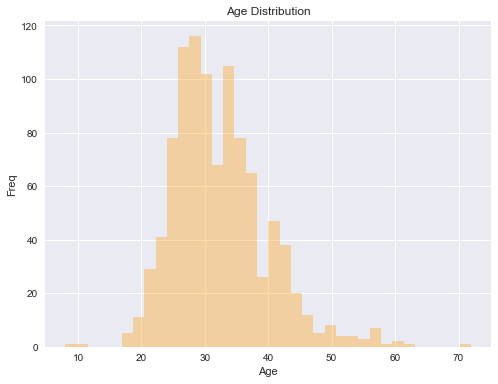

In [18]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(df['Age'].dropna(),ax=ax,kde=False,color='#ffa726')
plt.title('Age Distribution')
plt.ylabel('Freq')
plt.show()

We decided to focus the bins between the ages of 20 and 60 to ignore interns and people who maybe working past retirement age. Dividing the age by 10 will cause the data to be skewed, where there will be more data on the ranges of 20-30 and 30-40. But this is fine because this is a realistic skew, the majority of employees will be within that age range.

#### Splitting Dataframe into US and non-US

After finalizing our dataset, we are creating two subsets of the dataframes, one of the datasets has the information of participants in the US and the other dataset has the information of participants NOT in US. 

In [19]:
# Seperating dataframe into 2, one for United States and one for everywhere else
US = df[((df['Country'] == 'United States') & (df['Age']> 0) & (df['Age'] < 100))]
Not_US = df[((df['Country'] != 'United States') & (df['Age']> 0) & (df['Age'] < 100))]

#### Adding coordinates for each state for US dataset

Further, we are scrapping the data from (Link: https://inkplant.com/code/state-latitudes-longitudes) which provides latitudes and longitudes of all US-States. After that, we merge (longitude & latitude) information to our dataset and then the combined information will be used later in this project to visualize results in the form of US map.

In [20]:
# adding lat and log data for map
url = 'https://inkplant.com/code/state-latitudes-longitudes'
req = requests.get(url) 
root = BeautifulSoup(req.content, "html5lib")
table = root.find("table")
table = pd.read_html(str(table))
table = pd.DataFrame(table[0])
col = ['State', 'Latitude', 'Longitude']
table.columns = col
table[0:1].State.values

#using a states.csv that contains longitude and latitude that we are going to use later for maps (US only)
table_2 = pd.read_csv('states.csv')
table_2.index +=1

#merging long and lat in one dataset
main_table = table.merge(table_2, left_on = 'State', right_on='US State:', how='outer')
main_table = main_table.drop(labels = "State", axis =1)
main_table = main_table.drop(labels = "US State:", axis =1)

#Now we are creating two datasets 
#Note (One dataset has all the data of participants of US and other is rest of the world participants)
US = US.merge(main_table, left_on= 'state', right_on='Abbreviation:', how='outer')
drop_if_nan = ['Age','Gender', 'family_history', 'work_interfere', 'leave', 'state']
US.dropna(subset = drop_if_nan, inplace = True)

## Viewing the Data


df variable has the combined data of US and non-US. As mentioned above that we have split the dataset into two different dataframes.

Please note, the dataframe called "**US**" has the data of participants who are in US and the other dataset called "**Not_US**" has the data of participants who are NOT in US. 



In [21]:
df.head()

,Age,Gender,Country,state,family_history,work_interfere,leave,mental_health_consequence,phys_health_consequence,agesbinned
0,37,Female,United States,IL,No,Often,Somewhat easy,No,No,"(30, 40]"
1,44,Male,United States,IN,No,Rarely,Don't know,Maybe,No,"(40, 50]"
2,32,Male,Canada,NaN,No,Rarely,Somewhat difficult,No,No,"(30, 40]"
3,31,Male,United Kingdom,NaN,Yes,Often,Somewhat difficult,Yes,Yes,"(30, 40]"
4,31,Male,United States,TX,No,Never,Don't know,No,No,"(30, 40]"


In [22]:
US = US.drop(['Abbreviation:'], axis=1)
US.head()

,Age,Gender,Country,state,family_history,work_interfere,leave,mental_health_consequence,phys_health_consequence,agesbinned,Latitude,Longitude
0,37.0,Female,United States,IL,No,Often,Somewhat easy,No,No,"(30, 40]",40.349457,-88.986137
1,42.0,Female,United States,IL,Yes,Sometimes,Very difficult,Maybe,No,"(40, 50]",40.349457,-88.986137
2,29.0,Female,United States,IL,Yes,Rarely,Somewhat easy,No,No,"(19, 30]",40.349457,-88.986137
3,30.0,Male,United States,IL,Yes,Rarely,Don't know,Maybe,No,"(19, 30]",40.349457,-88.986137
4,33.0,Male,United States,IL,Yes,Sometimes,Very easy,Maybe,No,"(30, 40]",40.349457,-88.986137


In [23]:
Not_US.head()

,Age,Gender,Country,state,family_history,work_interfere,leave,mental_health_consequence,phys_health_consequence,agesbinned
2,32,Male,Canada,NaN,No,Rarely,Somewhat difficult,No,No,"(30, 40]"
3,31,Male,United Kingdom,NaN,Yes,Often,Somewhat difficult,Yes,Yes,"(30, 40]"
7,39,Male,Canada,NaN,No,Never,Don't know,No,No,"(30, 40]"
9,23,Male,Canada,NaN,No,Never,Don't know,No,No,"(19, 30]"
11,29,Male,Bulgaria,NaN,No,Never,Don't know,No,No,"(19, 30]"


### Mental Health is a Taboo

We believe that discussing mental health in the tech indsutry is still a little taboo but it is on the rise. All companies have taken steps to help their employees physical health issue. But many have taken little steps to help mental health issues. Below you can see this trend continue; compared to physical health issues, more people of all genders believe that discussing a mental health issue will have negative consequences. This may be due to the stigma or fear that the issue will get in the way of their performance, which may result in employees losing their job.

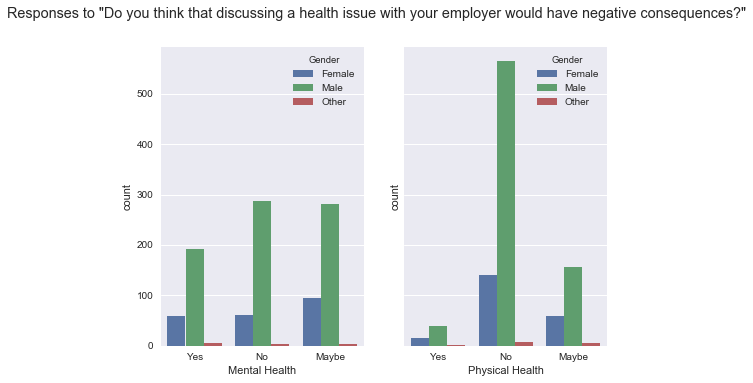

In [24]:
## show that mental health is a taboo subject, show graph
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.suptitle('Responses to "Do you think that discussing a health issue with your employer would have negative consequences?"')
g1 = sns.countplot(x='mental_health_consequence',
                  hue='Gender', data=df, ax=ax1, order=['Yes', 'No', 'Maybe'])

g2 = sns.countplot(x='phys_health_consequence',
                  hue='Gender', data=df, ax=ax2, order=['Yes', 'No', 'Maybe'])

g1.set_xlabel('Mental Health')
g2.set_xlabel('Physical Health')
plt.show()

## Work Interference of Participants in US & Outside US  (Pie Chart)
In order to view the results of work interference within the US and Not_US, we are using a pie chart format.

In the following pie charts, it shows the percentage of work inference reported by participants. The percentage is calculated based on the number participants in respective dataset or dataframe. In addition to work interference, the participants answered the question by mentioning **“Never”**,**“Rarely”**, **”Often”** or **”Sometimes”**. Furthermore, we chose to use percentage because the total number of participants in US are larger than participants outside of US. 

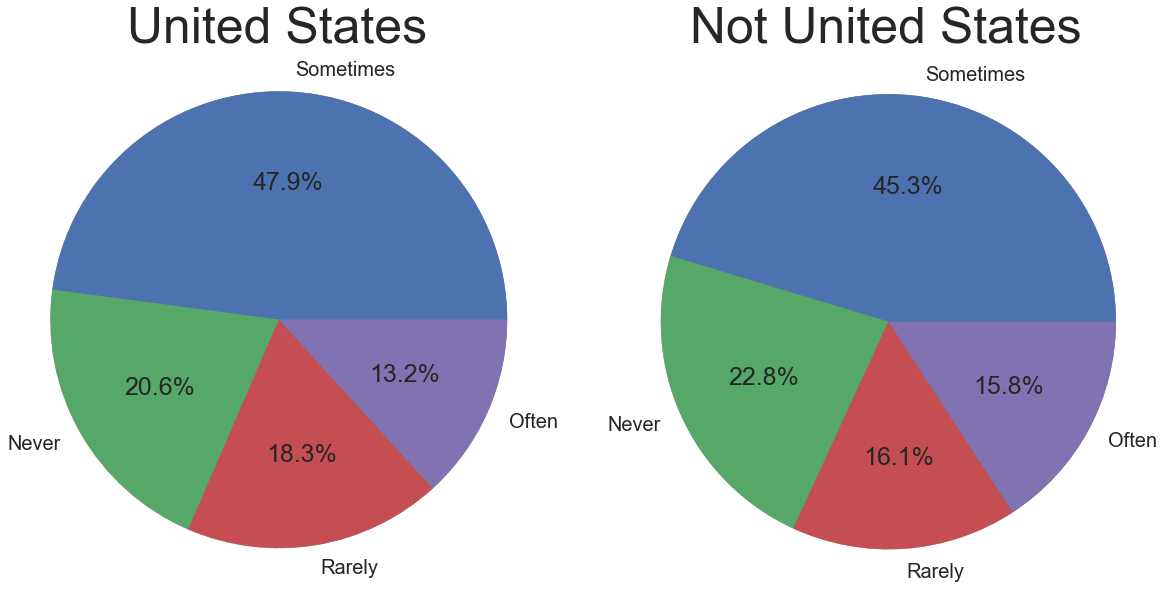

In [25]:
# Setting up figure
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

# data for the pie chart
labels = ['Sometimes', 'Never', 'Rarely', 'Often']
sizes_US = [US['work_interfere'].value_counts()[0],
         US['work_interfere'].value_counts()[1],
         US['work_interfere'].value_counts()[2],
         US['work_interfere'].value_counts()[3],]
sizes_notUS = [Not_US['work_interfere'].value_counts()[0],
         Not_US['work_interfere'].value_counts()[1],
         Not_US['work_interfere'].value_counts()[2],
         Not_US['work_interfere'].value_counts()[3],]


# US pie chart
patches, texts, autotexts = ax1.pie(sizes_US, labels=labels, autopct='%1.1f%%', shadow=True, radius = 20)
ax1.axis('equal')
ax1.set_title('United States', fontsize = 50)
# used to change font size of labels in the pie chart
for t in texts:
    t.set_size('20')
for t in autotexts:
    t.set_size('25')

# Not US pie chart
patches, texts, autotexts = ax2.pie(sizes_notUS, labels=labels, autopct='%1.1f%%', shadow=True, radius = 50)
ax2.axis('equal')
ax2.set_title('Not United States', fontsize = 50)
# used to change font size of labels in the pie chart
for t in texts:
    t.set_size('20')
for t in autotexts:
    t.set_size('25')
plt.show()

#### Analysis : Work Interference of Participants in US & Outside US

The “work_interfernce” question states: **“If you have a mental health condition, do you feel that it interferes with your work?”**

The majority of participants in US and outside of US reported that their mental health "Sometimes" interferes with their work performance. Also, there are about 13 to 15 percent participants who reported that their mental health often interferes with work. Furthermore, there were about 16 to 18 percent who mentioned that their mental health has rare or infrequent inference with work.

Based on these results, it provides a good understanding that there are about 50 percent of individuals who agree that their mental health is definitly an issue as it interferes with their work. 

Orginally we assumed that people in the US would have less mental health issues because US companies are leading most of the fight on mental health in the tech industry. But looking at the chart we cannot see much of a difference. So it goes to show, not enough companies are taking further steps to help their employees with mental health issues around the world.

## Leave effect on Work Interference (Bar Graph)
In this bar graph, we are using the full dataset to view the relationship between leave and work interference. We are assuming that if it is easier for an employee to take leave, their mental health issue will affect them less.

Please note, the respondents answered the question by saying "Somewhat easy", "Somewhat difficult", "Very difficult", "Very easy", or "Don't know" when they were asked "How easy is it for you to take medical leave for a mental health condition?"

In order to keep things simple, we have decided to combine the following responses into a single response.
- **"Somewhat difficult"** and **"Very difficult"** is **"difficult"**
- **"Somewhat easy"** and **"Very easy"** is **"easy"** 

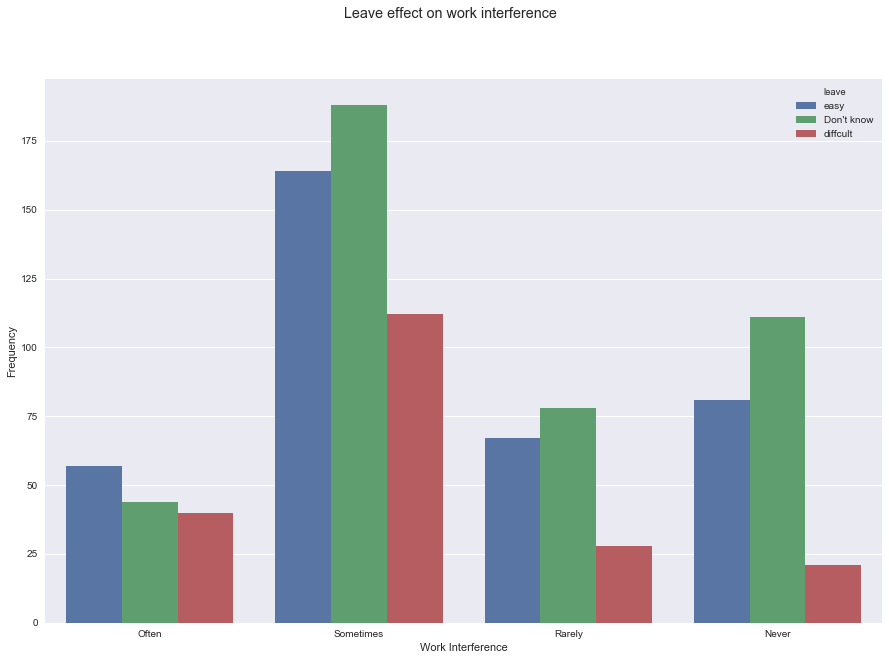

In [26]:
# combine leave categories
df['leave'] = df['leave'].replace(['Somewhat difficult', 'Very difficult'], 'diffcult')
df['leave'] = df['leave'].replace(['Somewhat easy', 'Very easy'], 'easy')

fig,ax = plt.subplots(figsize=(15,10))
ax = sns.countplot('work_interfere', hue = 'leave', data=df, order = ['Often', 'Sometimes', 'Rarely', 'Never'])
plt.ylabel('Frequency')
#plt.xlabel('If you have a mental health condition, do you feel that it interferes with your work?')
plt.xlabel('Work Interference')
fig.suptitle('Leave effect on work interference')
plt.show()

#### Analysis: Leave effect on work interference 

Acoording to the bar graph, the majority of respondents are either not sure or "Don't know" if it would be easy for them to take medical leave for a mental health condition. As a result of this, it raised a few questions about the individuals who responded to "Don't know" for leave question. For example, are the individuals afraid to give reasons to their employer which might affect their reputation at work or are there other fear in individual's mind about discussing further in regards to medical leave due to their mental health condition.

The second most frequent response for leave was "Somewhat easy" among all answers of work interference.If we exclude "Don't Know" results then we do see a realtion 

The bar graph somewhat aligns with our assumption, there are more people who have an easy time taking leave saying their mental health "Never" affect their work versus "Often" affets their work. And this makes sense because those who find it easier to take leave, are using that oppurtunity to take leave. Which gives them time to relax or go get help for their issues.




## Gender Vs. Work Interference (Bar Graph)

In this bar, we are trying to show the relation between gender and work interference. 

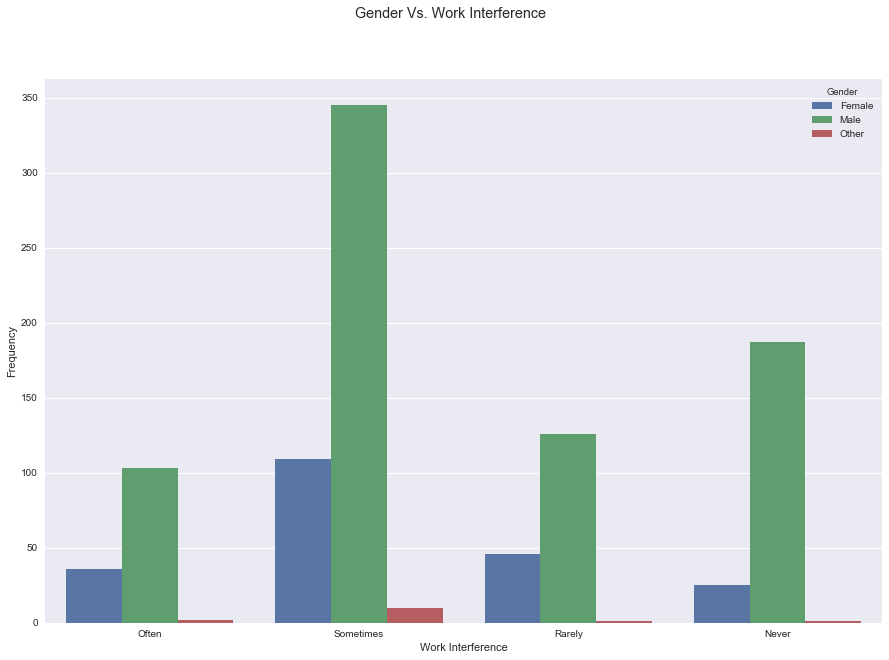

In [27]:
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.countplot('work_interfere', hue = 'Gender', data=df, order = ['Often', 'Sometimes', 'Rarely', 'Never'])
plt.ylabel('Frequency')
plt.xlabel('Work Interference')
fig.suptitle('Gender Vs. Work Interference')
plt.show()

#### Analysis: Gender Vs. Work Interference

Acording to the results from the bar graph, we need to note that we have a lot more male responses. Given we
have a lot more male responses, it doesn't mean men have higher struggle with mental illnesses. In reality,
we can make the interpretation that females are effected with mental illness more because more females 
responded to mental illness effecting them often than effecting them never. Males on the other hand 
had the oppossite response. More men responded saying never for mental health interfering their work.

## Family History effect on work interference (Bar Graph)

In this bar graph, we are viewing the effect of family histroy of mental health on work interference. People were asked to respond to "Do you have a family history of mental illness?" with a yes or no.

We assume that if the person had a faimly history of mental illness then their own current mental health issue would more likely affect them at work. This could because the previous history cause them to have a more sever case of the illness or they have a higher chance to develope mental health issues than for the people who have no history. 

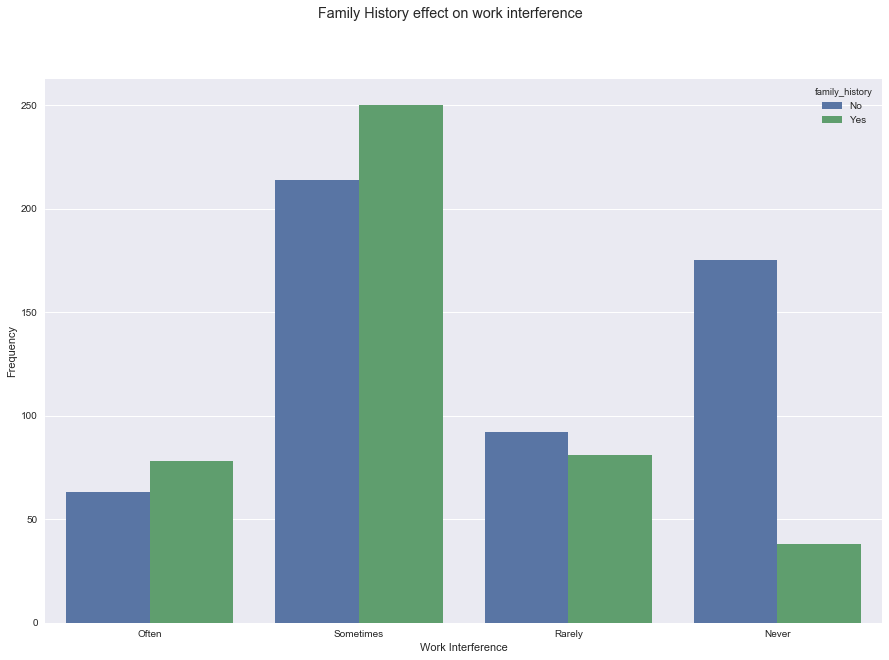

In [28]:
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.countplot('work_interfere', hue = 'family_history', data=df, order = ['Often', 'Sometimes', 'Rarely', 'Never'])
plt.ylabel('Frequency')
plt.xlabel('Work Interference')
fig.suptitle('Family History effect on work interference')
plt.show()

#### Analysis: Family History effect on work interference

In bar graph, the respondents who mentioned their mental health **"Often"**, and **"Sometimes"** interferes with their work say that they have a family history of mental health issues. On the other hand, existence of mental health condition in their family histroy is a lot less for individuals who mentioned **"Rarely"**, **"Never"** for work interference. As the result of this, it suggests the prevalence of mental health in family history is more significant for those individuals who experience more or somewhat difficulty to perform task at work. 

This fits prefectly with our assumptions; we can see that those with a previous family histroy are more likely to have their mental health illness affect them at work.

## Age effect on work interference (Bar Graph)

In the begining, we have created four different bins for age groups which puts the participants in the following age groups.

- [19-30] **Group A**
- [30-40] **Group B**
- [40-50] **Group C**
- [50-61] **Group D**

The dataframe contains mostly employees in the 20-40 range becuase this is the age where most people are working. We assume that people in the 30-40 range will be the most affected by their mental health issues because they have been working for 5+ years. This could mean that their mental health issues have gotten worse over time or they have been promoted to higher position which come with more stress. 

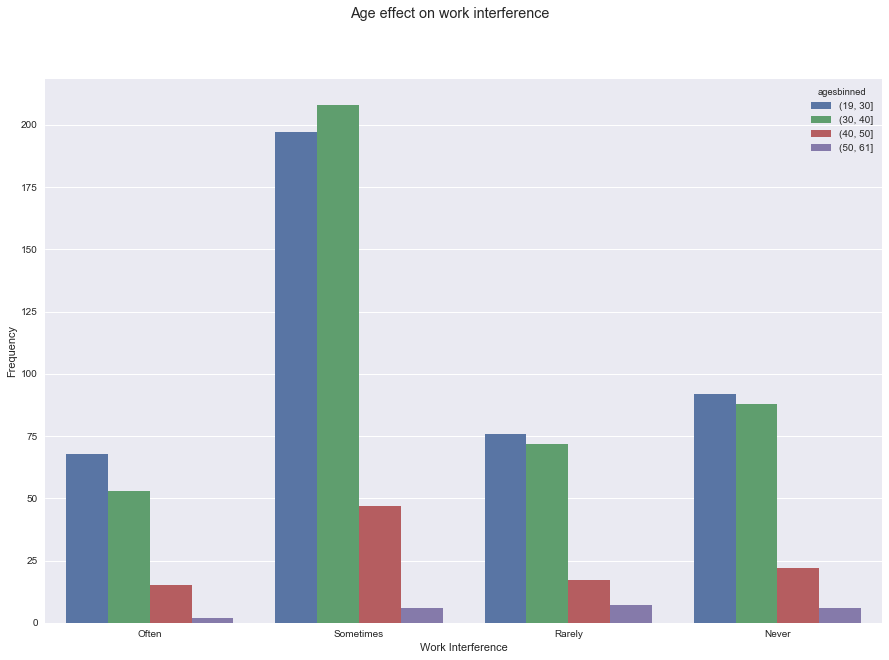

In [29]:
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.countplot('work_interfere', hue = 'agesbinned', data=df, order = ['Often', 'Sometimes', 'Rarely', 'Never'])
plt.ylabel('Frequency')
plt.xlabel('Work Interference')
fig.suptitle('Age effect on work interference')
plt.show()

### Analysis: Age effect on work interference

Based on the bar graph of ‘Age effect on work interference’, it shows that the **Group A [19-30]** and **Group B [30-40]** are the highlighted groups that has major effect of work interference due to mental health condition. As the result of this, we can observe that the individuals from the age of 19 to 40 are the most affected age group. Therefore, we could make a prediction that after ten years the prevalence of work interference due to mental health condition will be most common in Group C [40-50] and Group D [50-61]. 

The results are intresting; we assumed 30-40 year olds would be more affected but it turns out that 19-30 year olds reported that their mental health **"Often"** interferes with their work. This could be due to a number of factors but this is troubling news for us. When we enter the workforce we will be within the 19-30 age range, so it begs the question will we be more likely to develop mental health issues.  

## Map
We used the map to plot the participants response to the question, If you have a mental health condition, do you feel that it interferes with your work? They answered with **“Never”**,**“Rarely”**, **”Often”** or **”Sometimes”**, and each of those responses are plotted with different colors.

- **”Often”** 
- <font color=purple> **”Sometimes”** </font>
- <font color=blue> **“Rarely”** </font>
- <font color=red> **“Never”** </font>


In [30]:
map_osm = folium.Map(location=[37.0902, -95.7129], zoom_start=4.4)

often_cluster = MarkerCluster(name = 'Often')
sometimes_cluster = MarkerCluster(name = 'Sometimes')
rarely_cluster = MarkerCluster(name = 'Rarely')
never_cluster = MarkerCluster(name = 'Never')

for idx, row in US.iterrows():  
    
    
    # marker based on race
    if (row['work_interfere'] == 'Often'):
        c = 'black'
        folium.Marker(location=[row['Latitude'], row['Longitude']],
                  icon=folium.Icon(color = c, icon='none')).add_to(often_cluster)
    elif (row['work_interfere'] == 'Sometimes'):
        c = 'purple'
        folium.Marker(location=[row['Latitude'], row['Longitude']],
                  icon=folium.Icon(color = c, icon='none')).add_to(sometimes_cluster)
    elif (row['work_interfere'] == 'Rarely'):
        c = 'blue'
        folium.Marker(location=[row['Latitude'], row['Longitude']],
                  icon=folium.Icon(color = c, icon='none')).add_to(rarely_cluster)
    elif (row['work_interfere'] == 'Never'):
        c = 'red'
        folium.Marker(location=[row['Latitude'], row['Longitude']],
                  icon=folium.Icon(color = c, icon='none')).add_to(never_cluster)
  
    #plotting points
    

map_osm.add_child(often_cluster)
map_osm.add_child(sometimes_cluster)
map_osm.add_child(rarely_cluster)
map_osm.add_child(never_cluster)
map_osm.add_child(folium.LayerControl())

map_osm

### Analysis: Map
On the map we can see that most of the points are clustered around New York, Illinois, Seattle, and California. This is because this is where most of the tech companies are. If we use the layer control to compare data for **“Never”** and **”Often”** we see that NY, IL, and CA all have employees saying **“Never”** over **”Often”**, execpt for Seattle. The biggest company in Seattle is Amazon, this could mean that Amazon could be the culprit with their work being highly stressful for employees. But this is just an assumption because the data does not contain information about company names. 

If more data was collected from more places, we believe that DMV area would be the place where people's mental health would **”Often”** affect their work. This is because this area is where most of the government tech companies are placed. And they are less likely to give employees the freedom other tech companies could.

## Conclusion
According to the World Health Organization, it suggests that work is good for mental health; however, a negative working environment could lead to physical and mental health problems. In addition to that, the individuals could face negative experience due to poor organizational and managerial environment and they may have limited support to carry out their work. Further, the World Health Organization states that the risks to mental health includes “inadequate health and safety policies, poor communication management practices, limited participation in decision-making or low control over one’s area of work, inflexible working hours and unclear tasks or organizational objectives”. 

As we can see in results that mental health is a serious issue in technical industry as it affects the individuals with their work performance. Therefore, we could help to improve our working environment by implementing few changes as recommended by world health organization. For example, we could start by promoting mental health by developing positive aspects of work. 

Also, the employer should take the responsibility by acknowledging the needs of their employees and develop better policies for healthy workplace. For example, the employer should advocate about mental health problems and inform their employees that support is available to their all employees if the employees are experiencing any mental health symptoms like depression or excessive anxiety. Most importantly, the employer should involve their employees in decision-making and make their employees comfortable by conveying a feeling of control and participation. Also, the employer should recognize and reward their employees for their hard work and effort that they put toward company’s success. Most importantly, the companies should offer free courses which would help them emotionally to deal with stress. For example, Google offers a meditation course to their employees which helps them to reduce stress and makes them more efficient to perform better at work. By following these practices in workplace, it will help the individuals in tech industry to work efficiently and also it will help them to perform better in a less stressful environment. 


# Further Learning

Below are the links to the readings that we have used to talk about solutions to tackle mental health at work. 

- www.who.int/mental_health/in_the_workplace/en/.

- https://www.forbes.com/sites/toddessig/2012/04/30/google-teaches-employees-to-search-inside-yourself/#2afe82c7a820

## References: 

- Pandas: http://pandas.pydata.org/pandas-docs/version/0.18.0/
- Numpy: https://docs.scipy.org/doc/numpy/
- Matplotlib: https://matplotlib.org/
- Seaborn: https://seaborn.pydata.org/
- BeautifulSoup: https://www.crummy.com/software/BeautifulSoup/bs4/doc/
- Folium (IFrame, Marker Cluster): https://folium.readthedocs.io/en/latest/